# Table of Contents
 <p><div class="lev1"><a href="#Quantum-Transport-Clustering-Documentation"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quantum Transport Clustering Documentation</a></div><div class="lev2"><a href="#Graph-Methods"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graph Methods</a></div><div class="lev2"><a href="#Spectral-Clustering"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Spectral Clustering</a></div><div class="lev2"><a href="#Quantum-Transport-Clustering"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Quantum Transport Clustering</a></div><div class="lev1"><a href="#Data-Loading"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Loading</a></div><div class="lev1"><a href="#Demonstration"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demonstration</a></div><div class="lev2"><a href="#Stick-Data-Set"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stick Data Set</a></div><div class="lev2"><a href="#&quot;Thunder&quot;-Data-Set"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>"Thunder" Data Set</a></div><div class="lev2"><a href="#Annuli-Data-Set"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Annuli Data Set</a></div>

# Quantum Transport Clustering

The package `quantum_transport_clustering` (written in `python-3.6`) contains three major class objects:

- `GraphMethods`: construct undirected graphs, and compute and encapsulate their graph Laplacians
- `SpectralClustering`: perform correct spectral clustering on undirected graph Laplacians
- `QuantumTransportClustering`: perform quantum transport clustering on undirected graph Laplacians

Usage example

```python
import quantum_transport_clustering as qtc
graph_ = qtc.GraphMethods(data)
...
spec = qtc.SpectralClustering(n_clusters=3, norm_method='row')
...
shot = qtc.QuantumTransportClustering(n_clusters=3, Hamiltonian=Lap_)
```

## Graph Methods

```python
quantum_transport_clustering.GraphMethods(data_, graph_embedded=True, edt_tau=None, eps_quant=None, normed=True, compute_lap=True)
```

The Class `GraphMethods` is able to

- Generate Gaussian RBF adjacency matrix using Euclidean distances of the data distribution
- Compute Graph Lapalcian (symmetrically normalized by default)
- Store the raw data as well as adjacency matrix and graph Laplacian

| Parameters       |                                          |
| ---------------- | :--------------------------------------- |
| `data_`          | If `graph_embedded = True`, `data_` is a numpy array of shape ($n_\text{feature}$, $m_\text{sample}$), or  $m_\text{sample}$ points in $\mathbb R^{n_\text{feature}}$. If `graph_embedded = False`, `data_` is a numpy array of shape ( $m_\text{sample}$, $m_\text{sample}$) representing the adjacency of a graph with  $m_\text{sample}$ nodes. |
| `graph_embedded` | `bool`, optional. If `True`, assume the graph is embedded in a Euclidean space. If `False` , assume the input data set is an adjacency matrix not *a priori* embedded in a Euclidean space. |
| `edt_tau`        | `int`, $\tau > 0$, optional. If specified, it is the number of iterations of effective dissimilarity transformation (EDT). Neglected if `graph_embedded = False`. |
| `eps_quant`      | `float`, in range $0<\varepsilon<100$, optional. The the quantile of distance distribution. If not specified, $\varepsilon = 1$. Neglected if `graph_embedded = False`. |
| `normed`         | `bool`, optional. If `False`, graph Laplacian is $L = D - A$ where $D$ is degree diagonal matrix, and $A$ the adjacency matrix. If `True`, graph Laplacian will be normalized $H = D^{-\frac12} L D^{-\frac12}$. |
| `compute_lap`    | `bool`, optional. If `True`, graph Laplacian will be computed upon initialization. |

| Returns |                                          |
| ------- | :--------------------------------------- |
| `Lap_`  | numpy array of shape ( $m_\text{sample}$, $m_\text{sample}$). The graph Laplacian matrix $L$ or $H$. |

Example:

```python
graph_ = qtc.GraphMethods(data)
laplacian_matrix_ = graph_.Lap_
```



## Spectral Clustering

```python
quantum_transport_clustering.SpectralClustering(n_clusters, norm_method='row', is_exact=True)
```
Perform correct spectral clustering on undirected graph Laplacians. Requires `numpy >= 1.13`.


| Parameters    |                                          |
| ------------- | ---------------------------------------- |
| `n_clusters`  | `int`, $n_\text{cluster} > 0$ , the number of clusters. |
| `norm_method` | `None`, `"row"`, or `"deg"`. If `None`, the spectral embedding is not normalized. If `"row"`, the spectral embedding is $L^2$-normalized by row where each row represent a node. If `"deg"`, the spectral embedding is normalized by degree vector. |
| `is_exact`    | `bool`. If `True`, exact eigenvalues and eigenvectors will be computed. If `False`, first  (small) $n_\text{cluster}$ eigenvalues and eigenvectors will be computed. |

| Methods     |                                          |
| ----------- | ---------------------------------------- |
| `fit(Lap_)` | `Lap_` is the symmetric graph Laplacian. First, the eigenvalues and eigenstates are computed. Next, perform spectral embedding and $k$-means. |

| Returns   |                                          |
| --------- | ---------------------------------------- |
| `labels_` | An integer-valued numpy array of shape ($m_\text{sample}$). The class labels associated with each node. |

Example:

```python
spec = qtc.SpectralClustering(n_clusters=3, norm_method='row')
spec.fit(laplacian_matrix)
spec_labels_ = spec.labels_
```



## Quantum Transport Clustering

```python
quantum_transport_clustering.QuantumTransportClustering(n_clusters, Hamiltonian, s=1.0, is_exact=True, n_eigs=None)
```

Perform quantum transport clustering on undirected graph Laplacians.

| Parameters    |                                          |
| ------------- | ---------------------------------------- |
| `n_clusters`  | `int` , $n_\text{cluster} > 0$ , the number of clusters. |
| `Hamiltonian` | numpy array of shape ($m_\text{sample}$, $m_\text{sample}$). The symmetric graph Laplacian matrix $H$. |
| `s`           | `float`, $\tilde s>0$ , optional. The actual $s$-parameter of Laplace transform will be $s = \tilde s \times (E_{n_\text{cluster} - 1} - E_0) / (n_\text{cluster} - 1)$, where $E_n$ are eigenvalues of $H$. |
| `is_exact`    | `bool`, optional. If `True`, exact eigenvalues and eigenvectors of $H$ will be computed. If `False`, first `n_eigs` low energy states will be computed approximated. |
| `n_eigs`      | `int`, $n_\text{eigs} > 0$, optional. If `n_eigs` not specified and `is_exact = False`, $n_\text{eigs} = 10\times n_\text{cluster}$. If `n_eigs` is specified and `is_exact = True`, then first $n_\text{eigs}$ low exact energy state will be used to perform quantum transport clustering. The latter case can be used to speed up the clustering processes. |

| Methods      |                                          |
| ------------ | ---------------------------------------- |
| `Grind()`    | `Grind(s=None, grind='medium', method='diff', init_nodes_=None)`  Option `grind` can be `"coarse"`, `"medium"`, `"fine"`, `"micro"`, or `"custom"`. Option `method` can be `"diff"` or `"kmeans"` corresponding to direct difference and $k$-means methods. If `grind="custom"`, then `init_nodes_`  is the custom python `list` of initialization nodes. Method `Grind()` produces the array `Omega_`  or the $\Omega$-matrix which contains the raw class labels. |
| `Espresso()` | Perform "direct extraction method" on $\Omega$. This method creates attribute `labels_` as the predicted class labels. |
| `Coldbrew()` | Compute "consensus matrix" $C$ based on $\Omega$. This method creates attribute `consensus_matrix_`. |

| Returns             |                                          |
| ------------------- | ---------------------------------------- |
| `Omega_`            | An integer-valued numpy array of shape ($m_\text{sample}$, $m_\text{initialization}$). The raw class labels of $m_\text{samples}$ from quantum transport from $m_\text{initialization}$ nodes. |
| `labels_`           | An integer-valued numpy array of shape ($m_\text{sample}$). The final prediction by `Espresso()`. |
| `consensus_matrix_` | A float-valued numpy array of shape ($m_\text{sample}$, $m_\text{sample}$). The consensus matrix computed by `Coldbrew()`. |

Example:

```python
shot = qtc.QuantumTransportClustering(n_clusters=3, Hamiltonian=Lap_) # initialization
Omg_ = shot.Grind() # generate raw class label
# One may extract the eigevalues by attribute shot.Heigval
shot.Espresso() # direct extraction method
class_labels_ = shot.labels_
shot.Coldbrew() # generate consensus matrix
C_matrix_ = shot.consensus_matrix_
```

More in-depth discussions about the spectral clustering and QTC algorithms, including the interpretations of the parameters and variables, can be found at [Quantum Transport Senses Community Structure in Networks](https://arxiv.org/abs/1711.04979).

In [1]:
import quantum_transport_clustering as qtc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading 

In [2]:
data_ = qtc.DataLoader() # the usage of DataLoader is optional
data_.load("./data/stick", "easy") # path to file, nickname
data_.load("./data/thunder", "thor")
data_.load("./data/annuli", "ring")

>> Data set ./data/stick loaded.
>> Data set ./data/thunder loaded.
>> Data set ./data/annuli loaded.


In [3]:
graphs_ = dict.fromkeys(["easy", "thor", "ring"], None)
eps_q_ = {"easy": 3.5, "thor": 0.8, "ring": 0.4} # the epsilon quantile of distance distribution
for key in graphs_:
    print("[data set {}]".format(key))
    graphs_[key] = qtc.GraphMethods(data_.get(key).T, eps_quant=eps_q_[key])

[data set easy]
> Initial parameters: graph is embedded in 2 dim Euclidean space
> EDT iterations: edt_tau = 0
> Gaussian affinity eps quantile (%): eps_quant = 3.5
>> Distance matrix done.
>> Adjacency matrix done.
>> Graph Laplacian done
[data set thor]
> Initial parameters: graph is embedded in 2 dim Euclidean space
> EDT iterations: edt_tau = 0
> Gaussian affinity eps quantile (%): eps_quant = 0.8
>> Distance matrix done.
>> Adjacency matrix done.
>> Graph Laplacian done
[data set ring]
> Initial parameters: graph is embedded in 2 dim Euclidean space
> EDT iterations: edt_tau = 0
> Gaussian affinity eps quantile (%): eps_quant = 0.4
>> Distance matrix done.
>> Adjacency matrix done.
>> Graph Laplacian done


# Demonstration

## Stick Data Set

In [4]:
spec = qtc.SpectralClustering(n_clusters=3, norm_method='row')
spec.fit(graphs_["easy"].Lap_)

> Initialization parameters: n_cluster=3
> Row normalized spectral embedding.
> Exact eigs done


In [5]:
shot = qtc.QuantumTransportClustering(n_clusters=3, Hamiltonian=graphs_["easy"].Lap_)
shot.Grind() # generate quantum transport from 60 initialization nodes
shot.Espresso() # apply direct extract method

> Initialization parameters: n_cluster=3
> Laplace variable s = 1.0
> First 600 primes generated
>> Espresso: direct extraction method
>> Coldbrew: consensus matrix method
> Exact eigs done
> medium-ground: 60 initialization nodes


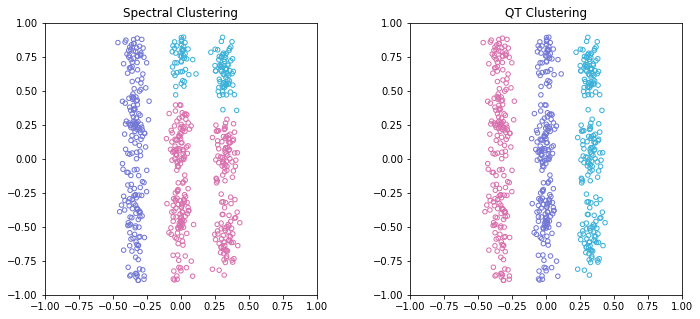

In [6]:
X = data_.get("easy").T
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[spec.labels_*2])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Spectral Clustering")
ax = fig.add_subplot(122, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[shot.labels_*2])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("QT Clustering")
plt.show()

## "Thunder" Data Set

In [7]:
spec = qtc.SpectralClustering(n_clusters=8, norm_method='row')
spec.fit(graphs_["thor"].Lap_)

> Initialization parameters: n_cluster=8
> Row normalized spectral embedding.
> Exact eigs done


In [8]:
shot = qtc.QuantumTransportClustering(n_clusters=8, Hamiltonian=graphs_["thor"].Lap_, n_eigs=100)
shot.Grind(grind="fine") # increase the number of initialization nodes to improve clustering accuracy
shot.Espresso() # apply direct extraction

> Initialization parameters: n_cluster=8
> Laplace variable s = 1.0
> First 2226 primes generated
>> Espresso: direct extraction method
>> Coldbrew: consensus matrix method
> Exact eigs done
> fine-ground: 102 initialization nodes


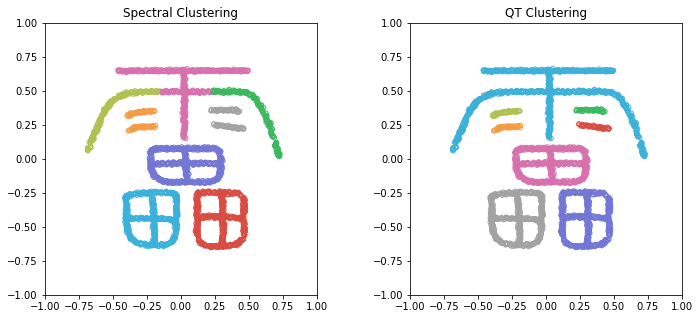

In [9]:
X = data_.get("thor").T
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[spec.labels_*2])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Spectral Clustering")
ax = fig.add_subplot(122, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[shot.labels_*2])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("QT Clustering")
plt.show()

## Annuli Data Set

In [10]:
spec = qtc.SpectralClustering(n_clusters=5, norm_method='row')
spec.fit(graphs_["ring"].Lap_)

> Initialization parameters: n_cluster=5
> Row normalized spectral embedding.
> Exact eigs done


In [11]:
shot = qtc.QuantumTransportClustering(n_clusters=5, Hamiltonian=graphs_["ring"].Lap_, n_eigs=100)
X = data_.get("ring").T
# idx_ = np.argsort(X[0,:])
idx_ = np.argsort(X[0,:]**2 + X[1,:]**2).tolist() # sort the data points according to r^2 = x^2 + y^2
shot.Grind(grind="custom", init_nodes_=idx_[:200:2]) # use points close to origin as initialization nodes to resolve the fine structures at the center
shot.Espresso()

> Initialization parameters: n_cluster=5
> Laplace variable s = 1.0
> First 1511 primes generated
>> Espresso: direct extraction method
>> Coldbrew: consensus matrix method
> Exact eigs done
> Warning: Some energy gaps are smaller than machine epsilon. QTC results may show numerial instability.
> custom-ground: 100 initialization nodes


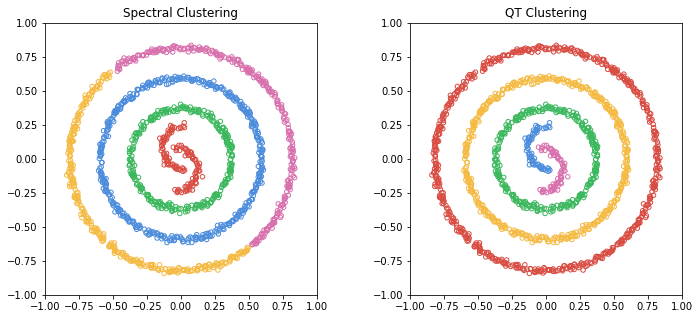

In [12]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[spec.labels_*3])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Spectral Clustering")
ax = fig.add_subplot(122, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[shot.labels_*3])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("QT Clustering")
plt.show()

In [13]:
shot.Coldbrew()
C_ = shot.consensus_matrix_

In [14]:
graph_c = qtc.GraphMethods(data_=C_, graph_embedded=False)
spec_c = qtc.SpectralClustering(n_clusters=5, norm_method='row')
spec_c.fit(graph_c.Lap_)

> Initial parameters: graph is not embedded in Euclidean space
>> Graph Laplacian done
> Initialization parameters: n_cluster=5
> Row normalized spectral embedding.
> Exact eigs done


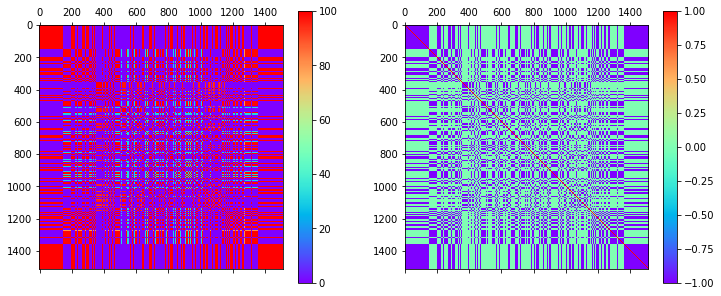

In [15]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, aspect="equal")
f = ax.matshow(C_, cmap=plt.cm.rainbow)
plt.colorbar(f)
ax = fig.add_subplot(122, aspect="equal")
f = ax.matshow(np.tanh(graph_c.Lap_/ graph_c.Lap_.mean()), cmap=plt.cm.rainbow)
plt.colorbar(f)
plt.show()


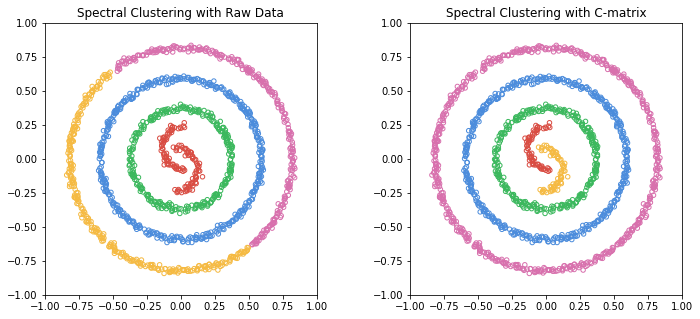

In [16]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[spec.labels_*3])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Spectral Clustering with Raw Data")
ax = fig.add_subplot(122, aspect="equal")
ax.scatter(X[0,:], X[1,:], s=20, c='', edgecolors=qtc.cc_[spec_c.labels_*3])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Spectral Clustering with C-matrix")
plt.show()